# Optimal Sizing of Nuclear Reactor for Embedded Grid Systems

This notebook executes all Temoa experiments and generates all plots for the Optimal Sizing paper.

Before beginning, you must have Temoa installed and the Temoa conda environment activated.

See the [Temoa Website](https://temoacloud.com/download/) for more information.

Requirements: 
1. The temoa environment ``temoa-py3`` from the link above.
2. ``jupyter`` must be installed because it does not come with the Temoa conda environment.
```sh
conda install jupyter
```
3. To run the notebook
   - Shutdown the kernel
   - ``conda activate temoa-py3``
   - ``jupyter notebook``

In [1]:
!snakemake --cores=4

Building DAG of jobs...
Using shell: /usr/bin/bash
Provided cores: 4
Rules claiming more threads will be scaled down.
Job counts:
	count	jobs
	1	all
	12	make_plots
	4	make_temoa_input
	4	temoa_run
	21

[Wed Jul 22 09:21:25 2020]
rule make_temoa_input:
    input: data_files/02_uiuc.sql
    output: data_files/02_uiuc.sqlite
    jobid: 3
    wildcards: db=02_uiuc


[Wed Jul 22 09:21:25 2020]
rule make_temoa_input:
    input: data_files/bau_uiuc.sql
    output: data_files/bau_uiuc.sqlite
    jobid: 1
    wildcards: db=bau_uiuc


[Wed Jul 22 09:21:25 2020]
rule make_temoa_input:
    input: data_files/01_uiuc.sql
    output: data_files/01_uiuc.sqlite
    jobid: 2
    wildcards: db=01_uiuc


[Wed Jul 22 09:21:25 2020]
rule make_temoa_input:
    input: data_files/03_uiuc.sql
    output: data_files/03_uiuc.sqlite
    jobid: 4
    wildcards: db=03_uiuc

[Wed Jul 22 09:21:25 2020]
Finished job 4.
1 of 21 steps (5%) done
[Wed Jul 22 09:21:25 2020]
Finished job 3.
2 of 21 steps (10%) done

[Wed Jul

[    0.46]
[    0.51] Solving.
[    0.51] Solving.
[    0.54] Solving.
[        ] Solving.Solver log file: '/home/dotson/research/temoa/data_files/debug_logs/lp_files/tmp6y3cxehi.cbc.log'
Solver solution file: '/home/dotson/research/temoa/data_files/debug_logs/lp_files/tmpat8m973r.pyomo.soln'
Solver problem files: ('/home/dotson/research/temoa/data_files/debug_logs/lp_files/tmpat8m973r.pyomo.lp',)
Solver log file: '/home/dotson/research/temoa/data_files/debug_logs/lp_files/tmp4vfy7vf9.cbc.log'
Solver solution file: '/home/dotson/research/temoa/data_files/debug_logs/lp_files/tmp89x6agsp.pyomo.soln'
Solver problem files: ('/home/dotson/research/temoa/data_files/debug_logs/lp_files/tmp89x6agsp.pyomo.lp',)
Solver log file: '/home/dotson/research/temoa/data_files/debug_logs/lp_files/tmp97ftbcw4.cbc.log'
Solver solution file: '/home/dotson/research/temoa/data_files/debug_logs/lp_files/tmpohdpl6l_.pyomo.soln'
Solver problem files: ('/home/dotson/research/temoa/data_files/debug_logs/lp_files/t

[Wed Jul 22 09:24:52 2020]
Finished job 18.
15 of 21 steps (71%) done

[Wed Jul 22 09:24:52 2020]
rule make_plots:
    input: data_files/bau_uiuc_bau_model/bau_OutputLog.log, data_files/01_uiuc_scenario01_model/scenario01_OutputLog.log, data_files/02_uiuc_scenario02_model/scenario02_OutputLog.log, data_files/03_uiuc_scenario03_model/scenario03_OutputLog.log
    output: figures/bau_all_capacity.png, figures/bau_all_generation.png, figures/bau_all_emissions.png
    jobid: 17
    wildcards: scenario=bau, sector=all

{'figures/bau_all_capacity.png', 'figures/bau_all_generation.png', 'figures/bau_all_emissions.png'}
[Wed Jul 22 09:24:52 2020]
Finished job 9.
16 of 21 steps (76%) done

[Wed Jul 22 09:24:52 2020]
rule make_plots:
    input: data_files/bau_uiuc_bau_model/bau_OutputLog.log, data_files/01_uiuc_scenario01_model/scenario01_OutputLog.log, data_files/02_uiuc_scenario02_model/scenario02_OutputLog.log, data_files/03_uiuc_scenario03_model/scenario03_OutputLog.log
    output: figures/sc

### Create BAU Generation Plot with 2014 Reference Year

In [2]:
import pandas as pd
import numpy as np
from data_parser import get_scenario_name
from data_parser import parse_datalines
from data_parser import variables
from data_parser import create_dataframe
from data_parser import bar_plot
from data_parser import get_output_files
from data_parser import make_plots

In [3]:
output = get_output_files()
output

['./data_files/02_uiuc_scenario02_model/scenario02_OutputLog.log',
 './data_files/bau_uiuc_bau_model/bau_OutputLog.log',
 './data_files/01_uiuc_scenario01_model/scenario01_OutputLog.log',
 './data_files/03_uiuc_scenario03_model/scenario03_OutputLog.log']

In [4]:
scenario = get_scenario_name(output[1])
datalines = parse_datalines(output[1])
df_elc = create_dataframe(datalines, 'Generation', sector='elc')

In [5]:
df_elc

,IMPELC,IMPSOL,IMPWIND,TURBINE
Year,,,,
2021,273.980658,6.88,23.350000,174.48934
2022,256.304938,24.69,23.350000,178.35507
2023,256.439208,24.69,23.350000,182.22079
2024,256.568638,24.69,23.350000,186.19136
2025,256.714468,24.69,23.350000,190.14553
2026,256.826455,24.69,23.350000,194.13355
2027,289.081387,24.69,53.628007,135.80061
2028,251.366857,24.69,91.511495,139.93165
2029,297.534827,24.69,45.468105,144.00707


Add data from [iCAP document](https://sustainability.illinois.edu/campus-sustainability/icap/)

In [6]:
yr2014 = pd.Series(data={'IMPELC-2014':199.788, 'TURBINE-2014':275.919}, name=2014)

In [7]:
df_elc2014 = df_elc.append(yr2014, ignore_index=False)
df_elc2014.fillna(0, inplace=True)
df_elc2014.sort_index(inplace=True)
df_elc2014

,IMPELC,IMPSOL,IMPWIND,TURBINE,IMPELC-2014,TURBINE-2014
Year,,,,,,
2014,0.000000,0.00,0.000000,0.00000,199.788,275.919
2021,273.980658,6.88,23.350000,174.48934,0.000,0.000
2022,256.304938,24.69,23.350000,178.35507,0.000,0.000
2023,256.439208,24.69,23.350000,182.22079,0.000,0.000
2024,256.568638,24.69,23.350000,186.19136,0.000,0.000
2025,256.714468,24.69,23.350000,190.14553,0.000,0.000
2026,256.826455,24.69,23.350000,194.13355,0.000,0.000
2027,289.081387,24.69,53.628007,135.80061,0.000,0.000
2028,251.366857,24.69,91.511495,139.93165,0.000,0.000


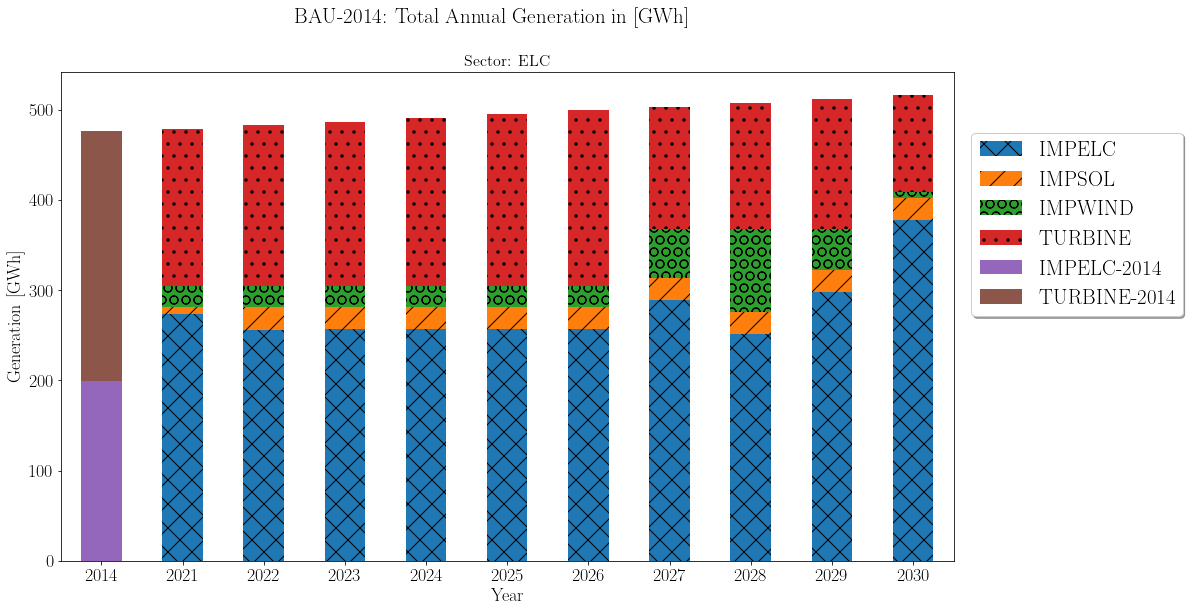

In [8]:
bar_plot(df_elc2014, 'Generation', 'BAU-2014', 'elc', True)
bar_plot(df_elc2014, 'Generation', 'BAU-2014', 'elc', False)

On the command line, execute (from pride/temoa-uiuc): 

```sh
python ~/research/temoa/temoa_model/ --config=data_files/run_mga_scenario02.txt
```

I have not yet figured out the best way to automate this process. My choice of naming convention is challenging Snakemake.